<a href="https://colab.research.google.com/github/1Aditya7/VaR-and-CVaR-Modelling/blob/main/VaR_and_CVaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime
from scipy.stats import norm

import datetime
from datetime import datetime, timedelta

In [ ]:
# Setting the start and end dates to 1 years from the current date (today)
end_date = datetime.now()  # Today's date
start_date = end_date - timedelta(days=1*365)  # 1 year

In [ ]:
df = yf.download(['AAPL','META', 'C', 'DIS'], start=start_date, end=end_date)['Adj Close']
df.index = pd.to_datetime(df.index)
df = df.dropna()
df.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,C,DIS,META
Date,,,,
2023-11-17 00:00:00+00:00,188.765244,43.731876,93.413193,334.034271
2023-11-20 00:00:00+00:00,190.516647,43.635464,94.286301,338.949493
2023-11-21 00:00:00+00:00,189.710602,43.471565,93.710838,335.968475
2023-11-22 00:00:00+00:00,190.377335,43.404083,94.325989,340.464874
2023-11-24 00:00:00+00:00,189.043869,43.606544,95.308243,337.214691


In [ ]:
df.pct_change().head()

Ticker,AAPL,C,DIS,META
Date,,,,
2023-11-17 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-20 00:00:00+00:00,0.009278,-0.002205,0.009347,0.014715
2023-11-21 00:00:00+00:00,-0.004231,-0.003756,-0.006103,-0.008795
2023-11-22 00:00:00+00:00,0.003514,-0.001552,0.006564,0.013383
2023-11-24 00:00:00+00:00,-0.007004,0.004665,0.010413,-0.009546


Text(0.5, 1.0, 'Adjusted Close Price for Sample Stock Tickers')

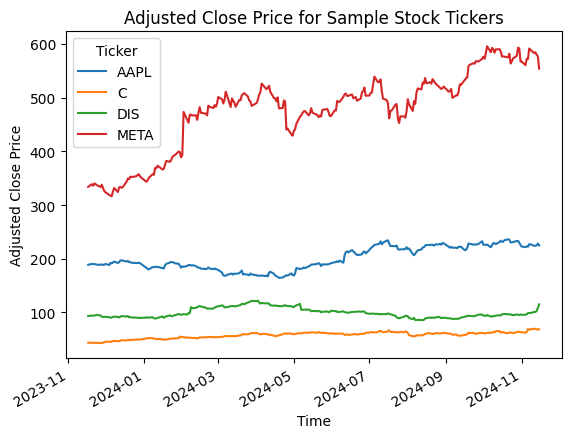

In [ ]:
ax = df.plot.line(xlabel="Time", ylabel="Adjusted Close Price")
ax.set_title("Adjusted Close Price for Sample Stock Tickers")

Text(0.5, 1.0, 'Apple Percentage Change Histogram')

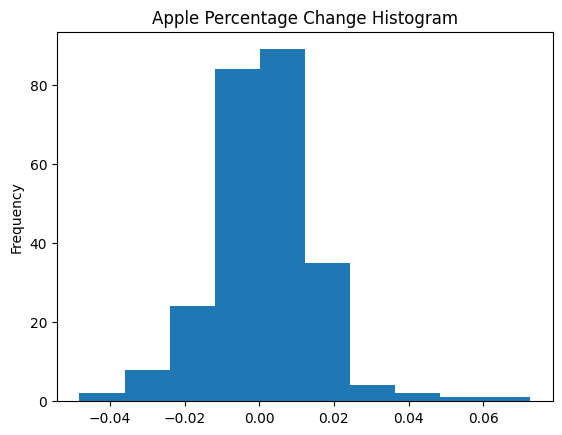

In [ ]:
ax = df['AAPL'].pct_change().plot(kind='hist')
ax.set_title("Apple Percentage Change Histogram")

In [ ]:
# Obtain percentage change per stock
returns = df.pct_change().dropna()

# Calculate the portfolio returns as the weighted average of the individual asset returns
weights = np.full((4), 0.25) # assuming equal weight
port_returns = (weights * returns).sum(axis=1) # weighted sum

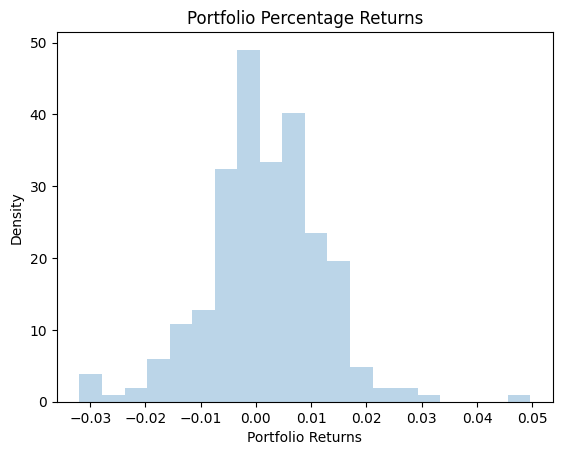

In [ ]:
plt.hist(port_returns, bins=20, density=True, alpha=0.3)
plt.xlabel("Portfolio Returns")
plt.ylabel("Density")
plt.title(f"Portfolio Percentage Returns")
plt.show()

In [ ]:
# Assume initial portfolio value
initial_portfolio = 100000

# Obtain percentage change per stock
returns = df.pct_change()

# Calculate the portfolio returns as the weighted average of the individual asset returns
weights = np.full((4), 0.25) # assuming equal weight
port_returns = (weights * returns).sum(axis=1) # weighted sum

# Calculate the portfolio's VaR at 95% confidence level
confidence_level = 0.95
# Calculate P(Return <= VAR) = alpha
var = port_returns.quantile(q=1-confidence_level)
# Calculate CVAR by computing the average returns below the VAR level
cvar = port_returns[port_returns <= var].mean()

# Multiply the VaR and CVaR by the initial investment value to get the absolute value
var_value = var * initial_portfolio
cvar_value = cvar * initial_portfolio

print(f"Historical VaR at {confidence_level} confidence level: {var_value:.2f} ({var:.2%})")
print(f"Historical CVaR at {confidence_level} confidence level: {cvar_value:.2f} ({cvar:.2%})")

Historical VaR at 0.95 confidence level: -1578.54 (-1.58%)
Historical CVaR at 0.95 confidence level: -2283.19 (-2.28%)


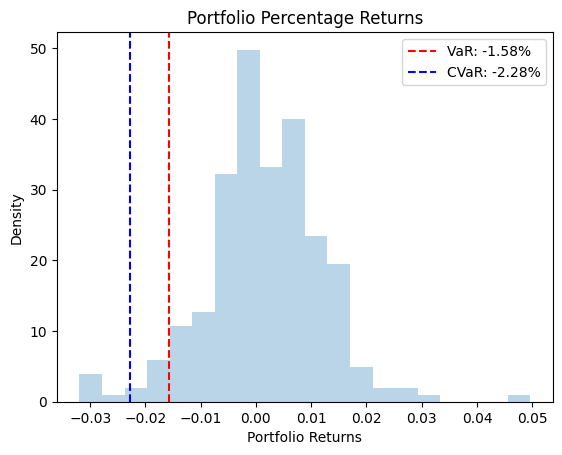

In [ ]:
plt.hist(port_returns, bins=20, density=True, alpha=0.3)

# Add VAR CVAR to the histogram
plt.axvline(x=var, color='red', linestyle='--', label=f"VaR: {var:.2%}")
plt.axvline(x=cvar, color='blue', linestyle='--', label=f"CVaR: {cvar:.2%}")

plt.legend()
plt.xlabel("Portfolio Returns")
plt.ylabel("Density")
plt.title(f"Portfolio Percentage Returns")
plt.show()

In [ ]:
# Assume initial portfolio value
initial_portfolio = 100000

# Obtain percentage change per stock
returns = df.pct_change()

# Calculate mean and covariance matrix of returns
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Calculate portfolio mean return and standard deviation
weights = np.full((4), 0.25)
port_mean_return = (weights * mean_returns).sum()
port_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

# Calculate VaR and CVaR using the parametric method
confidence_level = 0.95
z_score = norm.ppf(q=1-confidence_level)
var = - (norm.ppf(confidence_level)*port_std_dev - port_mean_return)
cvar = 1 * (port_mean_return - port_std_dev * (norm.pdf(z_score)/(1-confidence_level)))

var_initial = initial_portfolio * var
cvar_initial = initial_portfolio * cvar

print(f"Parametric VaR at {confidence_level} confidence level: {var_initial:.2f} ({var:.2%})")
print(f"Parametric CVaR at {confidence_level} confidence level: {cvar_initial:.2f} ({cvar:.2%})")

Parametric VaR at 0.95 confidence level: -1597.35 (-1.60%)
Parametric CVaR at 0.95 confidence level: -2041.27 (-2.04%)


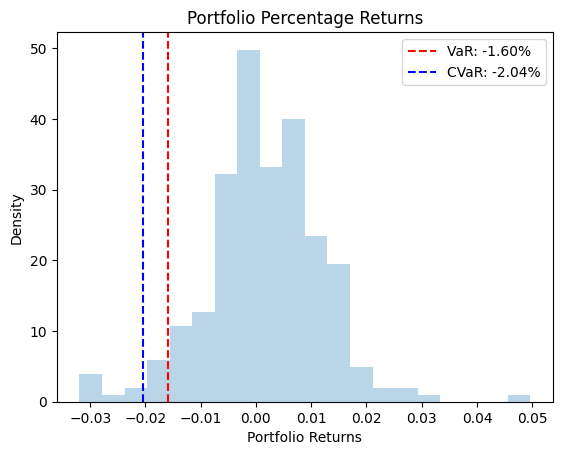

In [ ]:
plt.hist(port_returns, bins=20, density=True, alpha=0.3)

# Add VAR CVAR to the histogram
plt.axvline(x=var, color='red', linestyle='--', label=f"VaR: {var:.2%}")
plt.axvline(x=cvar, color='blue', linestyle='--', label=f"CVaR: {cvar:.2%}")

plt.legend()
plt.xlabel("Portfolio Returns")
plt.ylabel("Density")
plt.title(f"Portfolio Percentage Returns")
plt.show()


In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

initialPortfolio = 100000

n_simulation = 400 # number of simulations
T = 252 # number of trading days in a year
weights = np.full((4), 0.25)
meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns).T

sim_pct_change = np.full(shape=(T, n_simulation), fill_value=0.0)
for m in range(n_simulation):
    # Generate random numbers matrix for each day in the timeframe T and each stock in the portfolio
    Z = np.random.normal(size=(T, len(weights)))
    # Obtain the Cholesky decomposition of the covariance matrix
    # factoring the covariance matrix into the product of a lower triangular matrix (L) and its conjugate transpose (L*)
    L = np.linalg.cholesky(cov_matrix)
    # Calculate daily percentage change using the Cholesky decomposition
    daily_pct_change = meanM + np.inner(L, Z)
    # Calculate the simulated portfolio percentage change for each day in the timeframe T
    sim_pct_change[:,m] = np.inner(weights, daily_pct_change.T)

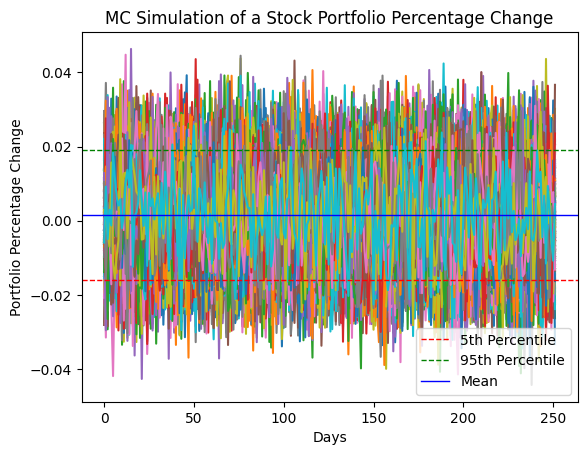

In [ ]:
# Plotting
plt.plot(sim_pct_change)

plt.axhline(np.percentile(sim_pct_change,5), color='r', linestyle='dashed', linewidth=1, label='5th Percentile')
plt.axhline(np.percentile(sim_pct_change,95), color='g', linestyle='dashed', linewidth=1,  label='95th Percentile')
plt.axhline(np.mean(sim_pct_change), color='b', linestyle='solid', linewidth=1, label='Mean')

plt.legend()
plt.ylabel('Portfolio Percentage Change')
plt.xlabel('Days')
plt.title('MC Simulation of a Stock Portfolio Percentage Change')
plt.show()

In [ ]:
confidence_level = 0.95
# Convert sim_returns to dataframe
port_pct_change = pd.Series(sim_pct_change[-1,:])
# Calculate the VAR and CVAR at 95% confidence level of the portfolio percentage change
mcVAR = port_pct_change.quantile(1 - confidence_level)
mcCVAR = port_pct_change[port_pct_change <= mcVAR].mean()

# Create data frame fill with 0
portfolio_returns = np.full(shape=(T, n_simulation), fill_value=0.0)

# Convert the percentage change to actual portfolio value
for m in range(n_simulation):
    portfolio_returns[:,m] = np.cumprod(sim_pct_change[:,m]+1)*initialPortfolio

# Select the last simulated trading day records
last_portfolio_returns = portfolio_returns[-1, :]
# Calculate the VAR and CVAR at 95% confidence level of the portfolio returns
mc_var_returns = np.percentile(last_portfolio_returns, 5)
mc_cvar_returns = last_portfolio_returns[last_portfolio_returns <= mc_var_returns].mean()

print(f"Monte Carlo VAR at 95% confidence level: ${mc_var_returns:.2f} ({mcVAR:.2%})")
print(f"Monte Carlo CVAR at 95% confidence level: ${mc_cvar_returns:.2f} ({mcCVAR:.2%})")

Monte Carlo VAR at 95% confidence level: $108473.76 (-1.57%)
Monte Carlo CVAR at 95% confidence level: $102057.64 (-2.02%)


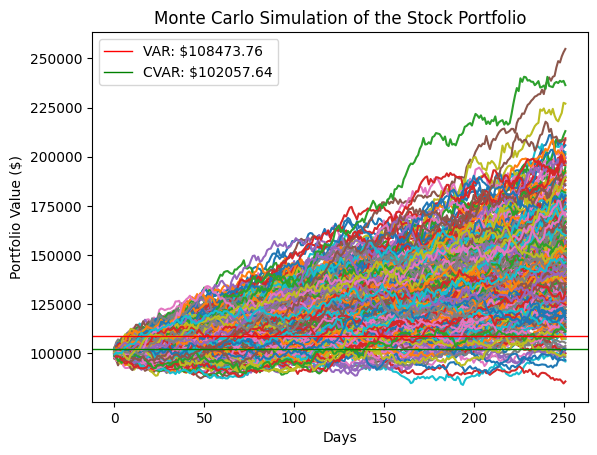

In [ ]:
# Plotting
plt.plot(portfolio_returns)

plt.axhline(mc_var_returns, color='r', linewidth=1, label=f'VAR: ${mc_var_returns:.2f}')
plt.axhline(mc_cvar_returns, color='g', linewidth=1,  label=f'CVAR: ${mc_cvar_returns:.2f}')

plt.legend(loc='upper left')
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of the Stock Portfolio')
plt.show()